In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
# para normalização - MinMaxScaler
# para padronização normal - StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,  cross_validate
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from plot_aux import plot_bar_list_features, plot_boxplots_by_columns, plot_by_columns, plot_boxplots_by_columns_hue, plot_bar_list_features
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


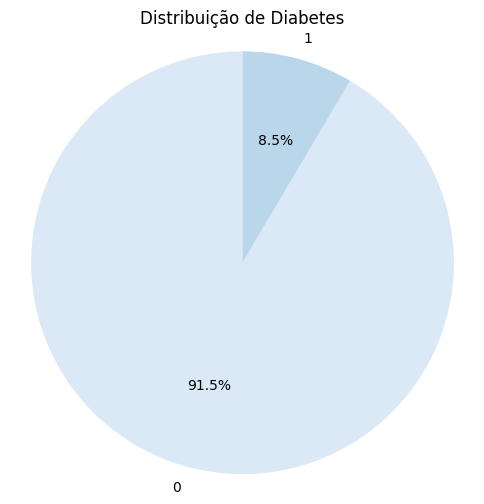

In [4]:
column ='diabetes'
column_name='gender'
df_counts = df.groupby(f'{column}').count()[column_name].sort_values(ascending=False).reset_index(name='count')[0:10]
df_counts[f'{column}'] = df_counts[f'{column}'].astype(str)

plt.figure(figsize=(6, 6))
plt.pie(df_counts['count'], labels=df_counts['diabetes'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))
plt.title('Distribuição de Diabetes')
plt.axis('equal')
plt.show()

In [5]:
df['blood_glucose_level'] = df['blood_glucose_level'].astype(float)

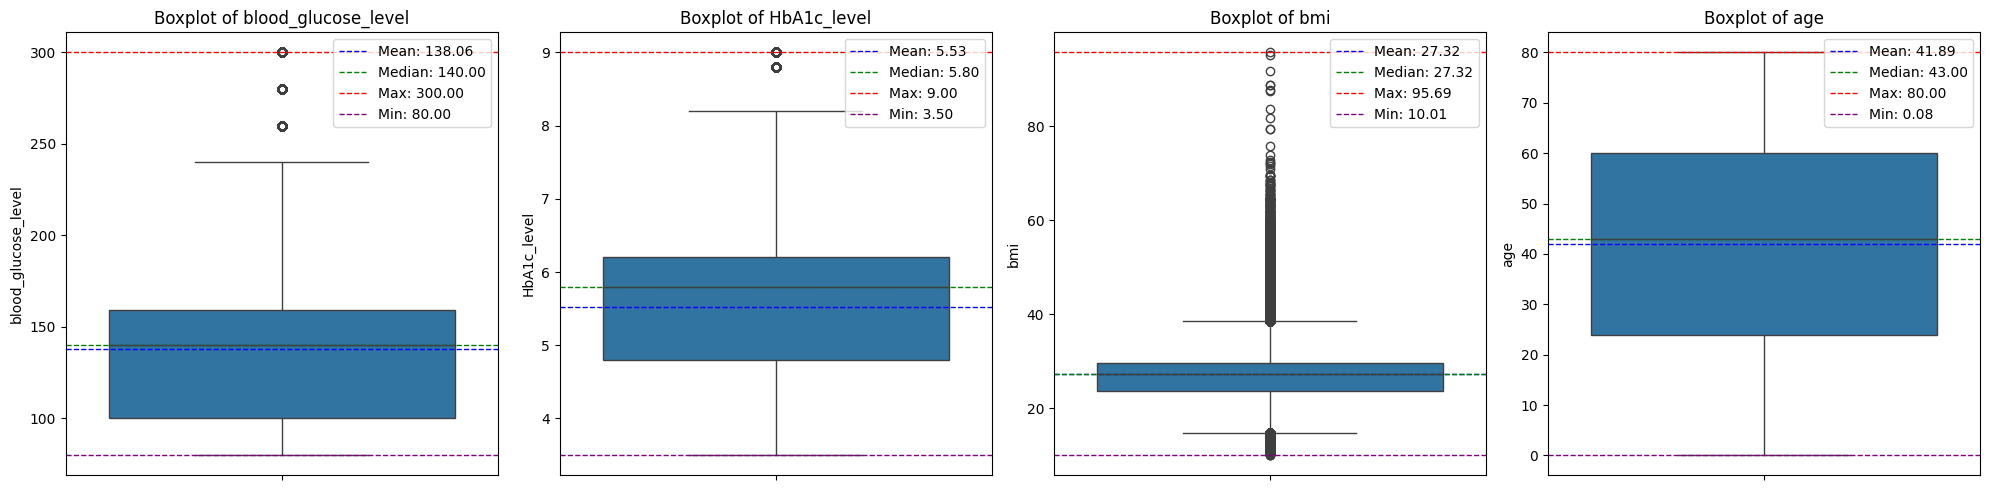

In [6]:
features_list = df.select_dtypes("float").columns.tolist()
plot_boxplots_by_columns(df,features_list)

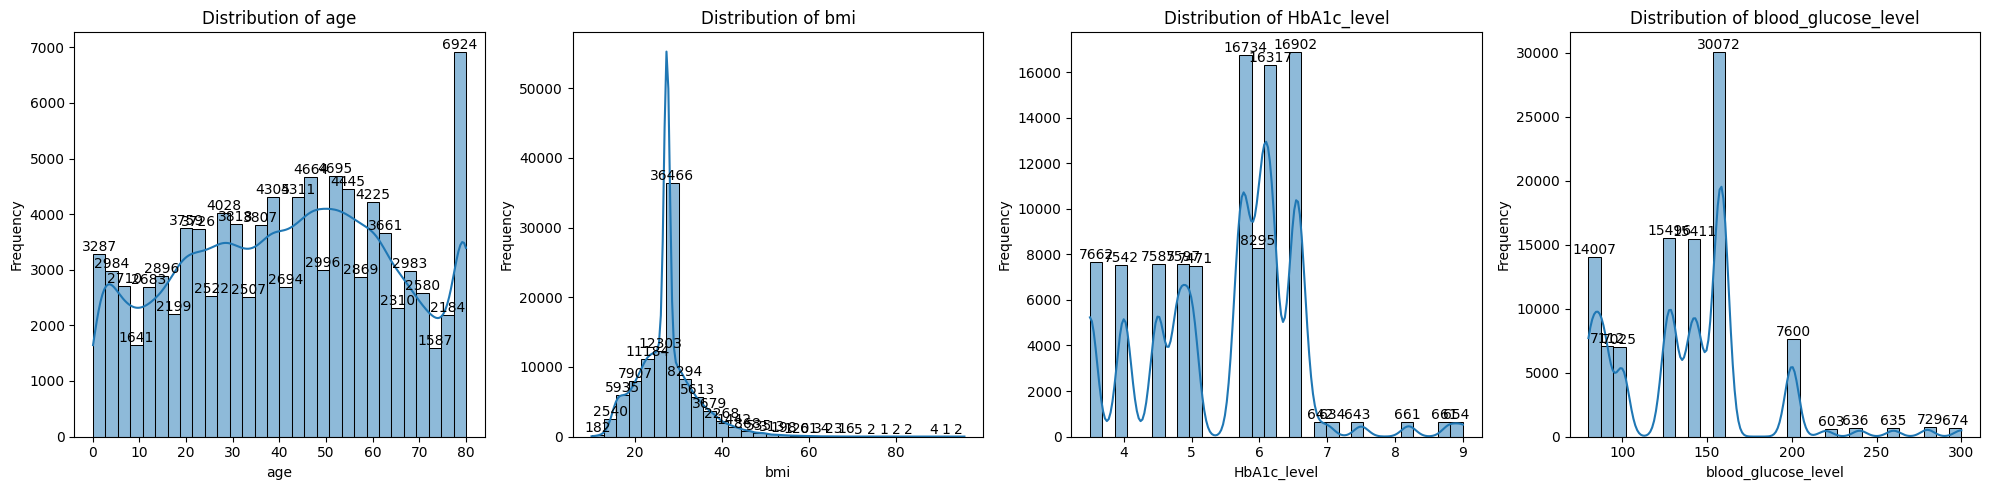

In [7]:
plot_by_columns(df,features_list)

In [8]:
string_features =  df.select_dtypes("object").columns.tolist()
string_features_bool = df.select_dtypes("int").columns.tolist()
string_features_bool.remove('diabetes')

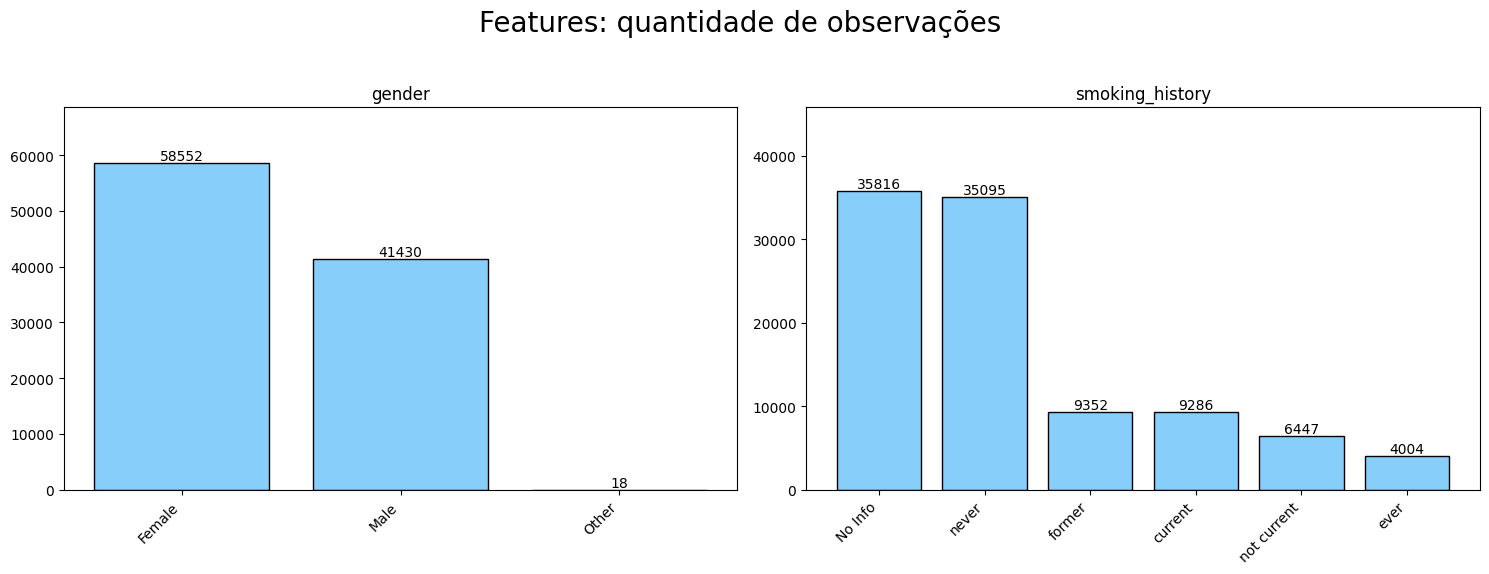

In [9]:
plot_bar_list_features(df=df, feature_list = string_features)

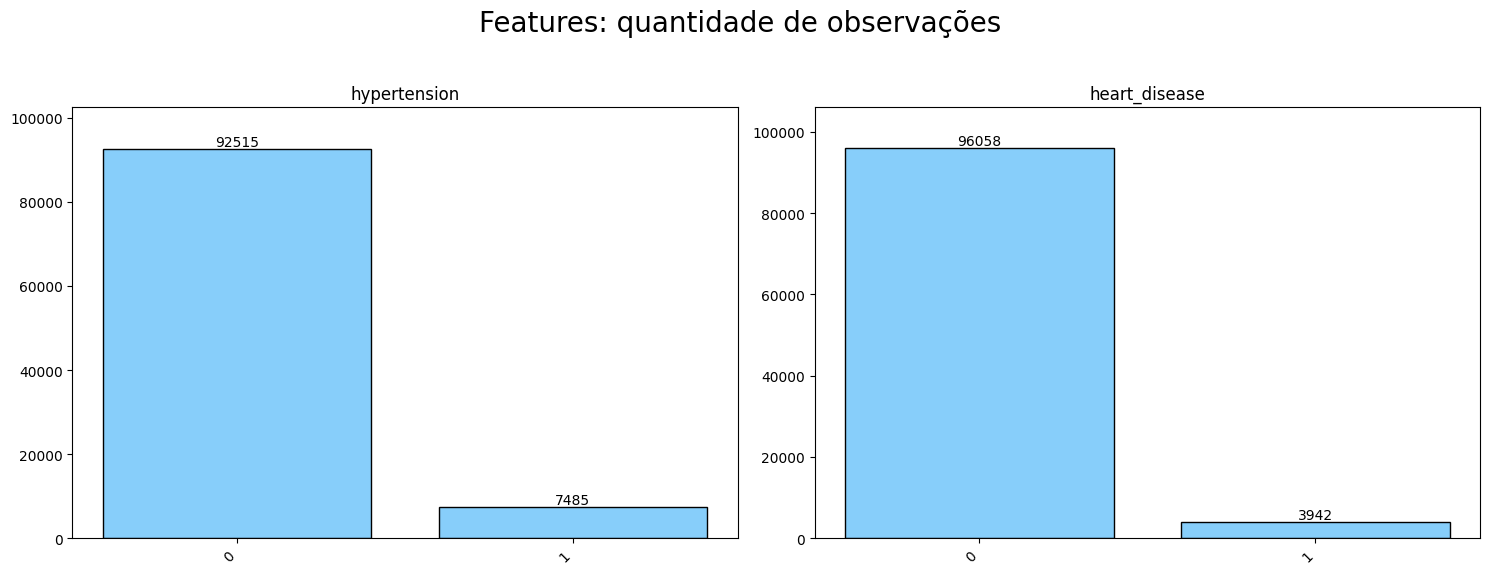

In [10]:
plot_bar_list_features(df=df, feature_list = string_features_bool)

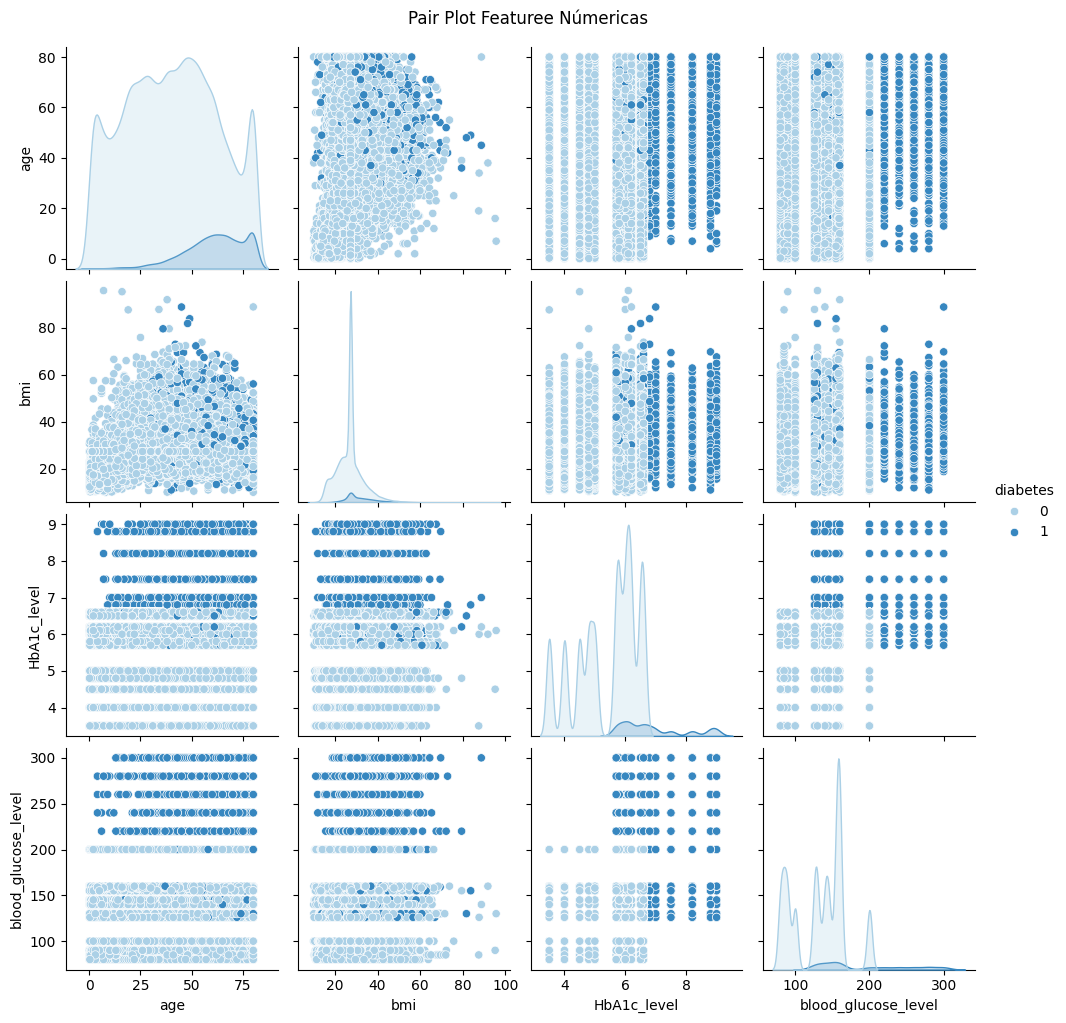

In [11]:
sns.pairplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes', palette='Blues')
plt.suptitle('Pair Plot Featuree Númericas', y=1.02) 
plt.show()

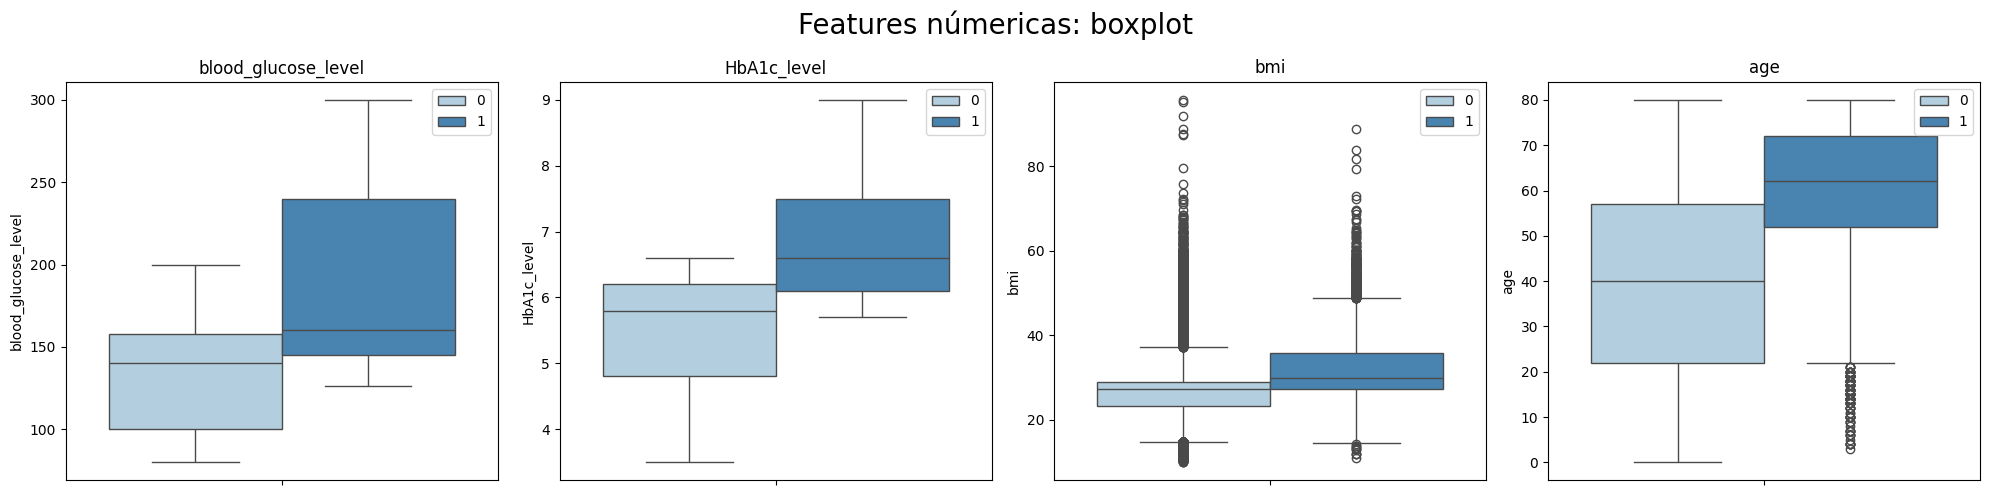

In [12]:
plot_boxplots_by_columns_hue(
    df=df, 
    column_names=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], 
    hue='diabetes')

In [13]:
correlation_matrix = df[['age',  'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']].corr(method='pearson')

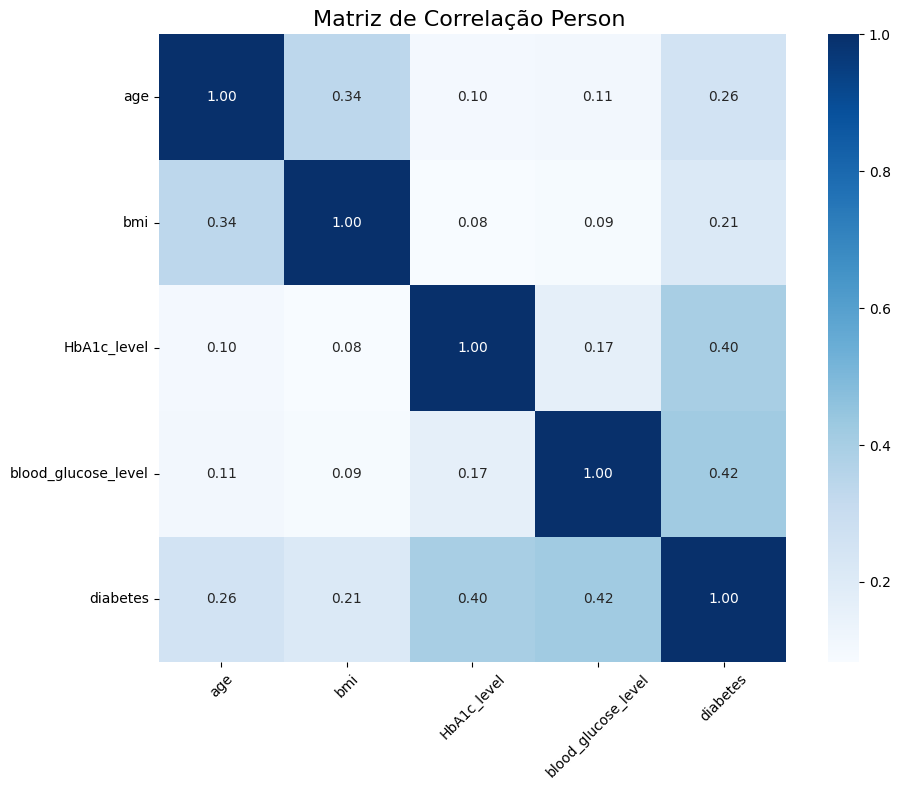

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True, square=True)
plt.title("Matriz de Correlação Person ", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [15]:
string_features_bool

['hypertension', 'heart_disease']

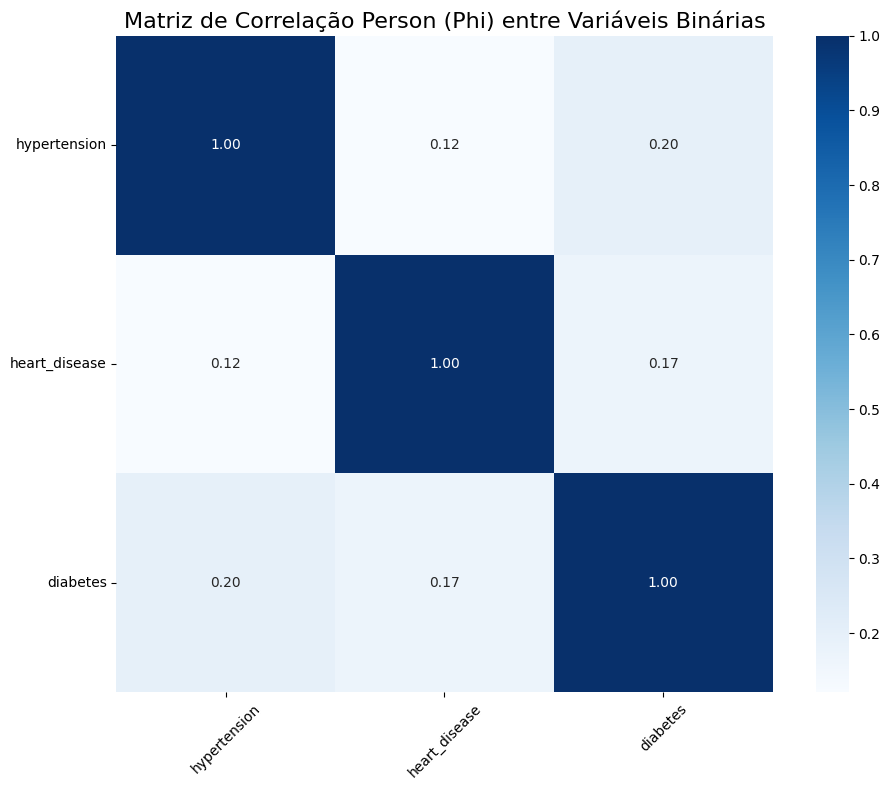

In [16]:
correlation_matrix_binary = df[['hypertension', 'heart_disease','diabetes']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_binary, annot=True, fmt=".2f", cmap="Blues", cbar=True, square=True)
plt.title("Matriz de Correlação Person (Phi) entre Variáveis Binárias", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


## Tranformação das features

In [17]:
df = df[df['gender'] != 'Other']

In [18]:
data = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [19]:
data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [20]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015,0.414375,0.092877,0.040037,0.093537,0.350983,0.064402
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906,0.492616,0.290261,0.196047,0.291185,0.477280,0.245468
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')

## Separando features e target
#### Dividir os dados em treino, validação e teste



In [22]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [23]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.25, random_state=42, stratify=y_) # 0.25 de 0.8 é 0.2


## Pré-processamento dos dados

In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [25]:
print("Aplicando Oversampling...")
oversampler = RandomOverSampler(random_state=42)
X_train_resampled_over, y_train_resampled_over = oversampler.fit_resample(X_train, y_train)
print(f"Shape de X_train após oversampling: {X_train_resampled_over.shape}")
print(f"Contagem de classes em y_train após oversampling:\n{y_train_resampled_over.value_counts()}")

Aplicando Oversampling...
Shape de X_train após oversampling: (109776, 12)
Contagem de classes em y_train após oversampling:
diabetes
0    54888
1    54888
Name: count, dtype: int64


In [26]:
## Identificação de colunas numéricas (float) para escalonamento
float_columns = X_train.select_dtypes(include=['float']).columns.tolist() 
print(f"Colunas numéricas para escalonamento: {float_columns}")

Colunas numéricas para escalonamento: ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [27]:
## Escalonamento das features numéricas
scaler = StandardScaler()
X_train[float_columns] = scaler.fit_transform(X_train[float_columns])
X_val[float_columns] = scaler.transform(X_val[float_columns])
X_test[float_columns] = scaler.transform(X_test[float_columns])

print("\nPré-processamento concluído.")


Pré-processamento concluído.


# Treinamento

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from utils.early_stopping import CustomEarlyStopping
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from scikeras.wrappers import KerasClassifier
 
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
y_val_encoded = to_categorical(y_val)
num_classes = y_train_encoded.shape[1]
num_classes

2

In [ ]:
# Ponderação de classes (opcional, para dados desbalanceados)
# Isso dá mais peso à classe minoritária durante o cálculo da perda,
# incentivando o modelo a classificá-la corretamente.
# Calcule os pesos com base na distribuição das classes em y_train.
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

## Rede neural 1 camada 

In [29]:
# config so we can easily change
balance_treatment_type = 'oversampling' # 'undersampling', or 'oversampling'
target_col = 'diabetes'
random_state = 42
dataset_test_size = 0.2
learning_rate = 0.001
epochs = 500
batch_size = 128
loss_function = 'categorical_crossentropy' # 'focal_loss', 'binary_crossentropy', 'categorical_crossentropy', 'sparse_categorical_crossentropy', 'mse', 'mae', 'hinge'
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
n_neurons = 5
activation_function = 'relu'
optimizer_type = 'adam'  # 'adam', 'sgd', 'rmsprop'

# Early stopping configuration
early_stopping_patience = 10 # number of epochs to wait before stopping the training
min_improvement = 0.02 # should improve at least 2% in the validation loss to continue training
early_stopping_monitor = 'recall'

In [30]:
optimizer = None
if optimizer_type == 'adam':
    optimizer = Adam(learning_rate=learning_rate)
elif optimizer_type == 'sgd':
    optimizer = SGD(learning_rate=learning_rate)
elif optimizer_type == 'rmsprop':
    optimizer = RMSprop(learning_rate=learning_rate)
else:
    raise ValueError(f"Invalid optimizer type: {optimizer_type}")

# Crie o modelo com o número de neurônios na camada de entrada
model_baseline = Sequential([
    Dense(n_neurons, activation=activation_function, input_shape=(X_train.shape[1],)),
    Dense(num_classes, activation='sigmoid') # Saída para classificação binária
])

model_baseline.compile(
    optimizer=optimizer,
    loss=loss_function, 
    metrics=metrics 
)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
# Treine o modelo
history_baseline = model_baseline.fit(
    X_train,
    y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    class_weight=class_weight_dict, 
    validation_data=(X_val, y_val_encoded) 
)

Epoch 1/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8055 - f1_score: 0.5647 - loss: 0.4754 - precision: 0.7740 - recall: 0.7507 - val_accuracy: 0.9430 - val_f1_score: 0.7646 - val_loss: 0.2001 - val_precision: 0.9560 - val_recall: 0.8873
Epoch 2/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9432 - f1_score: 0.7731 - loss: 0.1823 - precision: 0.9595 - recall: 0.8849 - val_accuracy: 0.9531 - val_f1_score: 0.8233 - val_loss: 0.1391 - val_precision: 0.9690 - val_recall: 0.8886
Epoch 3/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9550 - f1_score: 0.8324 - loss: 0.1353 - precision: 0.9698 - recall: 0.8952 - val_accuracy: 0.9575 - val_f1_score: 0.8407 - val_loss: 0.1240 - val_precision: 0.9717 - val_recall: 0.9105
Epoch 4/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.9563 - f1_score: 0.8391 - loss: 0.1256 - precision: 0.9705 - recall: 0.9112 - val_accuracy: 0.9588 - val_f1_score: 0.8465 - val_loss: 0.1183 - val_precision: 0.9718 - v

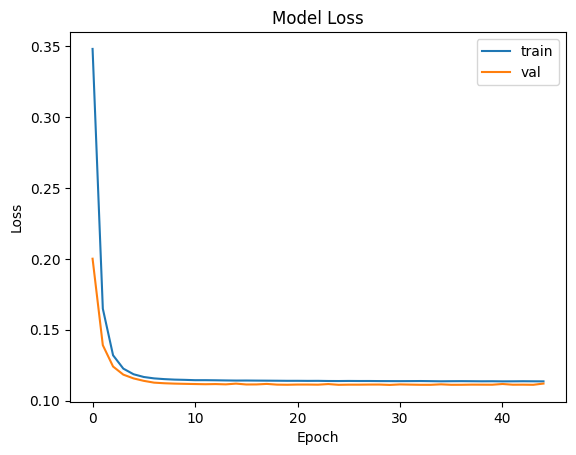

In [32]:
plt.plot(history_baseline.history['loss'], label='train')
plt.plot(history_baseline.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

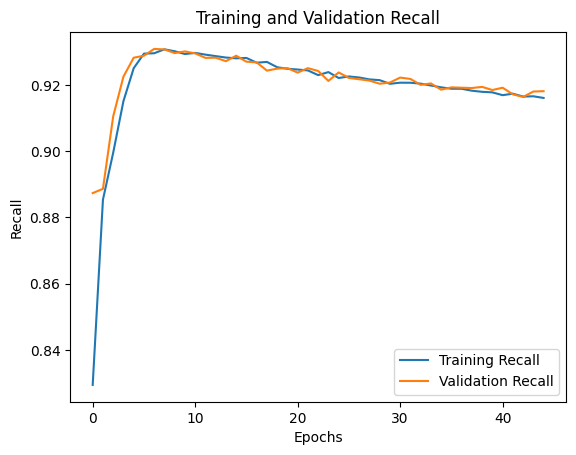

In [33]:
recall = history_baseline.history['recall']
val_recall = history_baseline.history['val_recall']
 
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [34]:
y_pred_test = model_baseline.predict(X_test)
y_pred_t = np.argmax(y_pred_test, axis=1)
y_test_non_categorical = np.argmax(y_test_encoded, axis=1)
print(classification_report(y_test_non_categorical, y_pred_t))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.88      0.63      0.73      1700

    accuracy                           0.96     19997
   macro avg       0.92      0.81      0.86     19997
weighted avg       0.96      0.96      0.96     19997



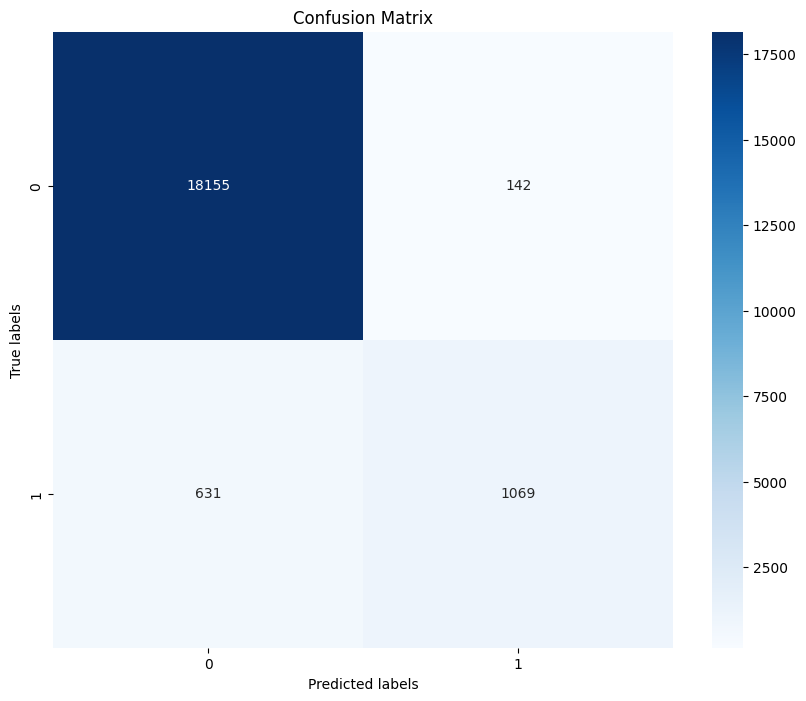

In [ ]:
cm = confusion_matrix(y_test_non_categorical, y_pred_t)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## modelo profundo com mais camadas e dropout

In [50]:
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
optimizer = Adam(learning_rate=0.001)
#Compile model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
# Train model
history = model.fit(
    X_train, 
    y_train_encoded, 
    epochs=1000, 
    batch_size=64, 
    verbose=1,
    class_weight=class_weight_dict, 
    validation_data=(X_val, y_val_encoded), 
    callbacks=[early_stopping]
)

Epoch 1/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9326 - f1_score: 0.7580 - loss: 0.2081 - precision: 0.9326 - recall: 0.9326 - val_accuracy: 0.9667 - val_f1_score: 0.8773 - val_loss: 0.0973 - val_precision: 0.9667 - val_recall: 0.9667
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9651 - f1_score: 0.8685 - loss: 0.1013 - precision: 0.9651 - recall: 0.9651 - val_accuracy: 0.9681 - val_f1_score: 0.8795 - val_loss: 0.0908 - val_precision: 0.9681 - val_recall: 0.9681
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9688 - f1_score: 0.8841 - loss: 0.0909 - precision: 0.9688 - recall: 0.9688 - val_accuracy: 0.9707 - val_f1_score: 0.8899 - val_loss: 0.0843 - val_precision: 0.9707 - val_recall: 0.9707
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.9704 - f1_score: 0.8879 - loss: 0.0857 - precision: 0.9704 - recall: 0.9704 - val_accuracy: 0.9722 - val_f1_score: 0.8966 - val_loss: 0.0813 - val_precision: 0.9722 - v

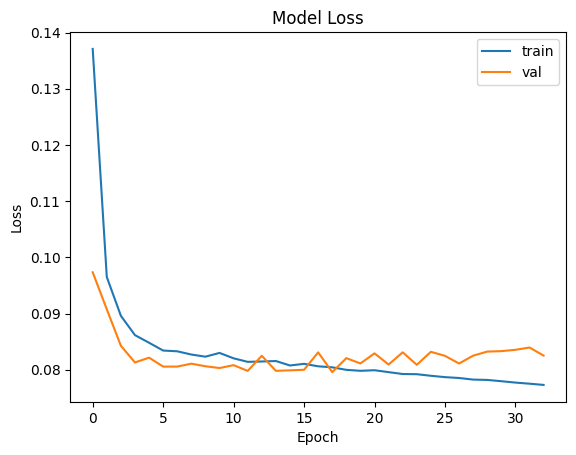

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

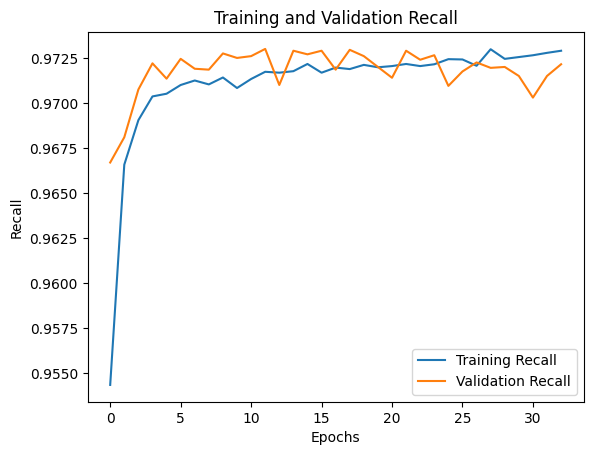

In [ ]:
recall = history.history['recall']
val_recall = history.history['val_recall']

plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

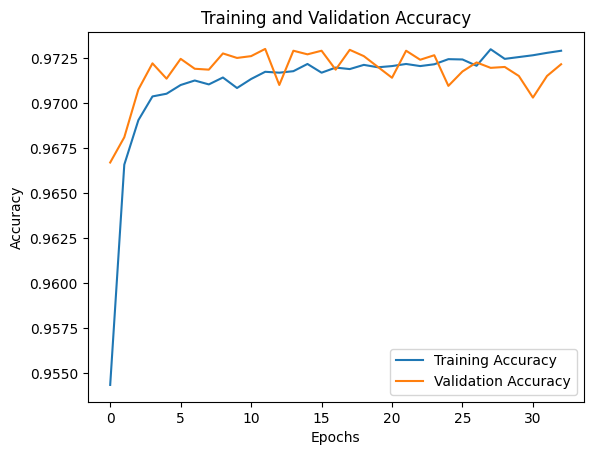

In [54]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
y_pred_test = model.predict(X_test)
y_pred_t = np.argmax(y_pred_test, axis=1)
y_test_non_categorical = np.argmax(y_test_encoded, axis=1)
print(classification_report(y_test_non_categorical, y_pred_t))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18297
           1       0.99      0.68      0.81      1700

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.90     19997
weighted avg       0.97      0.97      0.97     19997



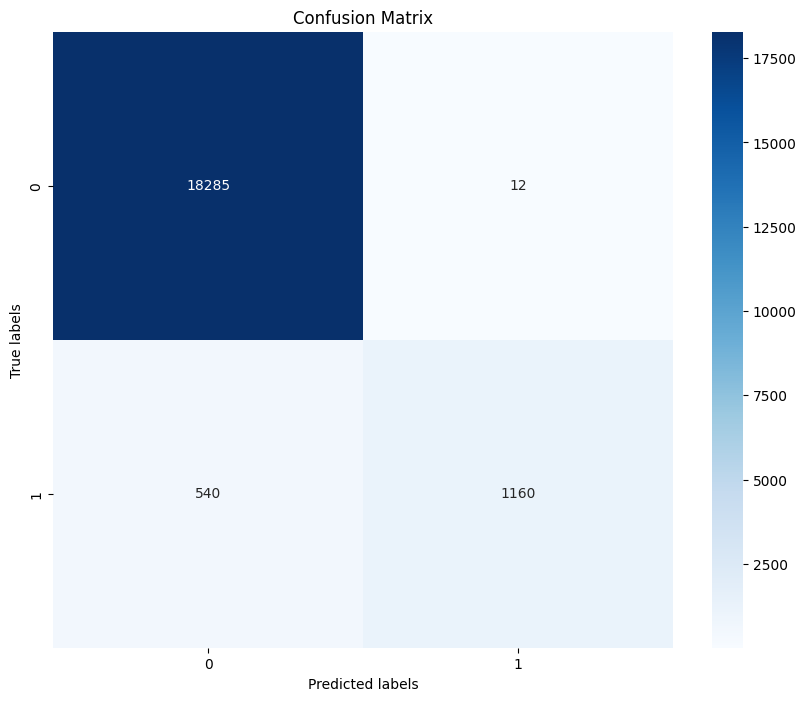

In [56]:
cm = confusion_matrix(y_test_non_categorical, y_pred_t)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import itertools
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import recall_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam, RMSprop
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import to_categorical


# Grid de parâmetros
param_grid = {
    'n_camadas_ocultas': [1, 3, 5, 7],
    'n_neuronios': [4, 8, 16, 32],
    'ativacao': ['relu', 'tanh'],
    'otimizador': ['adam', 'rmsprop'],
    'taxa_aprendizado': [0.01, 0.001, 0.0001],
    'batch_size': [10, 20, 40],
    'epochs': [10, 50, 100],
}

# Guardar resultados
results = []

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Loop sobre todas as combinações do grid
for (n_camadas, n_neuronios, ativacao, otimizador, taxa, batch, epochs) in itertools.product(
    param_grid['n_camadas_ocultas'],
    param_grid['n_neuronios'],
    param_grid['ativacao'],
    param_grid['otimizador'],
    param_grid['taxa_aprendizado'],
    param_grid['batch_size'],
    param_grid['epochs']
):

    # Construir modelo
    model = Sequential()
    model.add(Dense(n_neuronios, input_dim=X_train.shape[1], activation=ativacao))
    for _ in range(n_camadas - 1):
        model.add(Dense(n_neuronios, activation=ativacao))
    model.add(Dense(num_classes, activation='softmax'))

    # Otimizador
    if otimizador == 'adam':
        optimizer = Adam(learning_rate=taxa)
    elif otimizador == 'rmsprop':
        optimizer = RMSprop(learning_rate=taxa)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)

    # Treinar
    history = model.fit(
        X_train, y_train_encoded,
        epochs=epochs,
        batch_size=batch,
        verbose=0,
        class_weight=class_weight_dict, 
        validation_data=(X_val, y_val_encoded), 
        callbacks=[early_stopping]
    )

    # Avaliar recall na validação
    y_val_pred = model.predict(X_val)
    y_val_classes = np.argmax(y_val_pred, axis=1)
    y_val_true = np.argmax(y_val_encoded, axis=1)
    recall_val = recall_score(y_val_true, y_val_classes, average="macro")

    # Avaliar recall no teste (opcional)
    y_test_pred = model.predict(X_test)
    y_test_classes = np.argmax(y_test_pred, axis=1)
    y_test_true = np.argmax(y_test_encoded, axis=1)
    recall_test = recall_score(y_test_true, y_test_classes, average="macro")

    # Guardar resultados
    results.append({
        "camadas": n_camadas,
        "neurônios": n_neuronios,
        "ativação": ativacao,
        "otimizador": otimizador,
        "taxa_aprendizado": taxa,
        "batch_size": batch,
        "epochs": epochs,
        "recall_val": recall_val,
        "recall_test": recall_test
    })

# Converter para DataFrame
df_results = pd.DataFrame(results)

# Melhor modelo pelo recall de validação
best_model = df_results.sort_values(by="recall_val", ascending=False).iloc[0]
print("Melhor configuração pela validação:")
print(best_model)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
625/625 ━━━